In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
toronto_df=pd.read_csv('listings (1).csv')
print(toronto_df)

             id                                               name    host_id  \
0          1419                    Beautiful home in amazing area!       1565   
1          8077                 Downtown Harbourfront Private Room      22795   
2         23691                    Queen Bedroom close to downtown      93825   
3         27423        Executive Studio Unit- Ideal for One Person     118124   
4         30931                 Downtown Toronto - Waterview Condo      22795   
...         ...                                                ...        ...   
15827  48082008  Modern and Cozy 1Bed Suite | Gorgeous Balcony ...  105087986   
15828  48082033     Stay In Affordable GTA community in North York  357277547   
15829  48082242  Astounding Penthouse w/ Lakeview in DowTown To...  174227176   
15830  48082302  Close to Subway - Low Monthly Rate (Apr 19-Aug...   79437942   
15831  48082311  Astounding Panoramic Condo on Clouds- Biz Dist...  364392846   

            host_name  neig

In [3]:
toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15832 non-null  int64  
 1   name                            15831 non-null  object 
 2   host_id                         15832 non-null  int64  
 3   host_name                       15816 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15832 non-null  object 
 6   latitude                        15832 non-null  float64
 7   longitude                       15832 non-null  float64
 8   room_type                       15832 non-null  object 
 9   price                           15832 non-null  int64  
 10  minimum_nights                  15832 non-null  int64  
 11  number_of_reviews               15832 non-null  int64  
 12  last_review                     

In [4]:
#dropping irrelevent columns 
toronto_df.drop(['name','last_review','neighbourhood_group','longitude','latitude','host_name',
                 'calculated_host_listings_count','host_id','availability_365','reviews_per_month',
                'minimum_nights',], 
                axis=1, inplace=True)
print(toronto_df)

             id                      neighbourhood        room_type  price  \
0          1419                    Little Portugal  Entire home/apt    469   
1          8077  Waterfront Communities-The Island     Private room     96   
2         23691               Briar Hill-Belgravia     Private room     72   
3         27423                  Greenwood-Coxwell  Entire home/apt     45   
4         30931  Waterfront Communities-The Island  Entire home/apt    128   
...         ...                                ...              ...    ...   
15827  48082008  Waterfront Communities-The Island  Entire home/apt    130   
15828  48082033                        Black Creek     Private room     15   
15829  48082242                            Niagara  Entire home/apt    638   
15830  48082302         Islington-City Centre West  Entire home/apt    120   
15831  48082311              Church-Yonge Corridor  Entire home/apt    368   

       number_of_reviews  
0                      7  
1        

In [5]:
toronto_df.isnull().sum()

id                   0
neighbourhood        0
room_type            0
price                0
number_of_reviews    0
dtype: int64

In [6]:
#checking for duplicated data
sum(toronto_df.duplicated())


0

In [7]:
toronto_df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
toronto_df['neighbourhood'].unique()

array(['Little Portugal', 'Waterfront Communities-The Island',
       'Briar Hill-Belgravia', 'Greenwood-Coxwell', 'South Parkdale',
       'Oakridge', 'Wexford/Maryvale', 'Church-Yonge Corridor',
       'Rosedale-Moore Park', 'Bay Street Corridor', 'South Riverdale',
       'Niagara', 'Palmerston-Little Italy', 'Dufferin Grove',
       'High Park North', 'Danforth East York', 'High Park-Swansea',
       'Agincourt South-Malvern West', 'Humewood-Cedarvale',
       'Stonegate-Queensway', 'Lawrence Park North',
       'North St.James Town', 'Annex', 'Caledonia-Fairbank', 'Moss Park',
       'Yonge-St.Clair', 'Leaside-Bennington', 'Blake-Jones',
       'Dovercourt-Wallace Emerson-Junction', 'Willowdale East',
       'The Beaches', 'Danforth', 'Kensington-Chinatown', 'Regent Park',
       'Roncesvalles', 'University', 'East End-Danforth',
       'Woodbine Corridor', 'Brookhaven-Amesbury', 'Oakwood Village',
       'Wychwood', 'Junction Area', 'Trinity-Bellwoods',
       'Broadview North', 

In [9]:
toronto_df.describe()

,id,price,number_of_reviews
count,1.583200e+04,15832.000000,15832.000000
mean,2.797080e+07,136.679573,26.784992
std,1.381186e+07,316.199774,54.284943
min,1.419000e+03,0.000000,0.000000
25%,1.685769e+07,60.000000,1.000000
50%,2.939999e+07,93.000000,6.000000
75%,4.037653e+07,148.000000,27.000000
max,4.808231e+07,13000.000000,828.000000


# Info on the variety listings 

In [10]:
total_rooms = toronto_df['room_type'].value_counts()
print(total_rooms)

Entire home/apt    10122
Private room        5415
Shared room          246
Hotel room            49
Name: room_type, dtype: int64


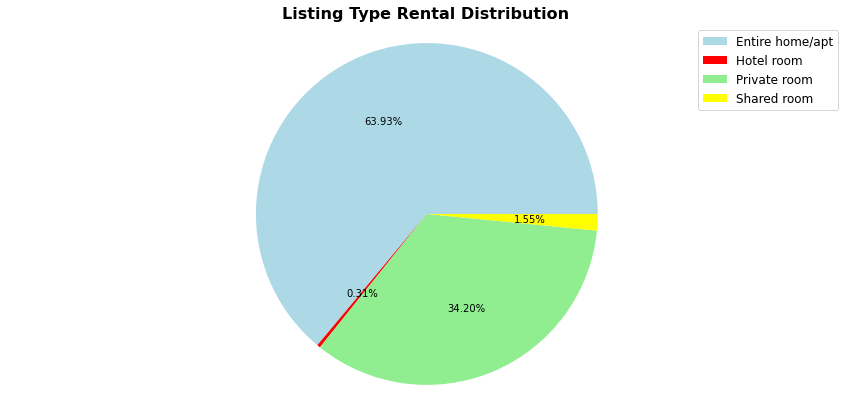

In [11]:
room_type=toronto_df.groupby('room_type')['id'].count().reset_index()
room_type.rename(columns={'id':'n_rooms'},inplace=True)
plt.figure(figsize=(15,7)) #width of 15 & height of 7
plt.pie(room_type['n_rooms'],autopct='%1.2f%%',colors=['lightblue','red','lightgreen','yellow'],) #autopct- displays percentage
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Listing Type Rental Distribution', fontsize='16', color='black',fontweight='heavy')
plt.savefig('image1.png')
plt.show()
plt.close()

Most the the listings were entire homes/apartments

# price

In [12]:
toronto_df['price'].describe()


count    15832.000000
mean       136.679573
std        316.199774
min          0.000000
25%         60.000000
50%         93.000000
75%        148.000000
max      13000.000000
Name: price, dtype: float64

average listing price is around $136, with the max being $13000

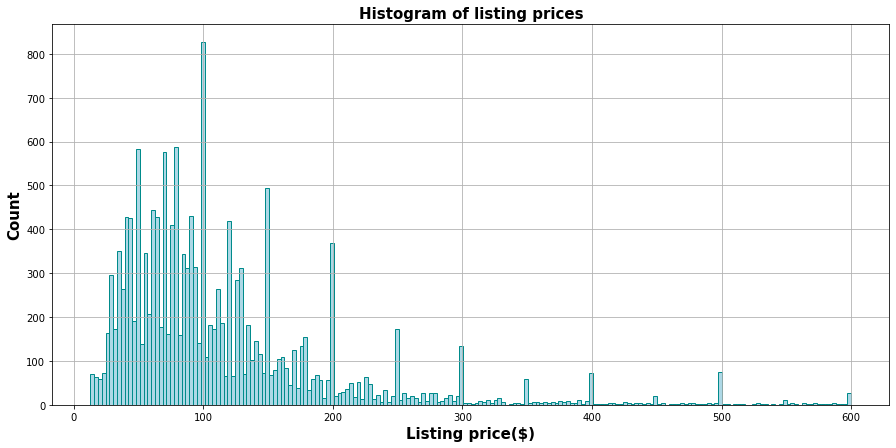

In [13]:
#price distribution- histogram
plt.figure(figsize =(15, 7))
toronto_df.loc[(toronto_df.price <= 600) & (toronto_df.price > 0)].price.hist(bins=200,color='lightblue',edgecolor='darkcyan')
plt.ylabel('Count',fontsize='15',fontweight='heavy')
plt.xlabel('Listing price($)',fontsize='15',fontweight='heavy')
plt.title('Histogram of listing prices',fontsize='15',fontweight='heavy')
plt.savefig('image2.png')
plt.show()


In [13]:
#finding median price with the outliers removed
price_per_roomtype= toronto_df.loc[(toronto_df.price <= 600) & (toronto_df.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .reset_index()

print(price_per_roomtype)

         room_type  price
0  Entire home/apt    117
1       Hotel room     75
2     Private room     55
3      Shared room     25


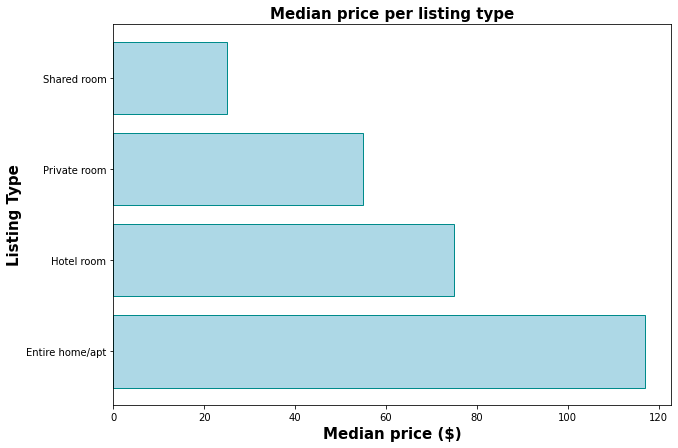

In [15]:
plt.figure(figsize =(10, 7))
plt.barh(price_per_roomtype['room_type'], price_per_roomtype['price'],color='lightblue',edgecolor='darkcyan',align='center')
#if you write plt.barh -- makes it horizontal
plt.xlabel('Median price ($)',fontsize='15',fontweight='heavy')
plt.ylabel('Listing Type',fontsize='15',fontweight='heavy')
plt.title('Median price per listing type',fontsize='15',fontweight='heavy')
plt.savefig('image3.png')
plt.show()

In [16]:
neighbourhood_gr_srt = toronto_df.groupby('neighbourhood')['id']\
                    .count()\
                    .sort_values(ascending=False)\
                    .head(5)\
                    .reset_index()
print(neighbourhood_gr_srt)

                       neighbourhood    id
0  Waterfront Communities-The Island  2776
1                            Niagara   638
2              Church-Yonge Corridor   542
3                              Annex   520
4                Bay Street Corridor   467


In [17]:
neighbourhood_gr_srt.rename(columns={'id':'n_listings'},inplace=True)
print(neighbourhood_gr_srt)

                       neighbourhood  n_listings
0  Waterfront Communities-The Island        2776
1                            Niagara         638
2              Church-Yonge Corridor         542
3                              Annex         520
4                Bay Street Corridor         467


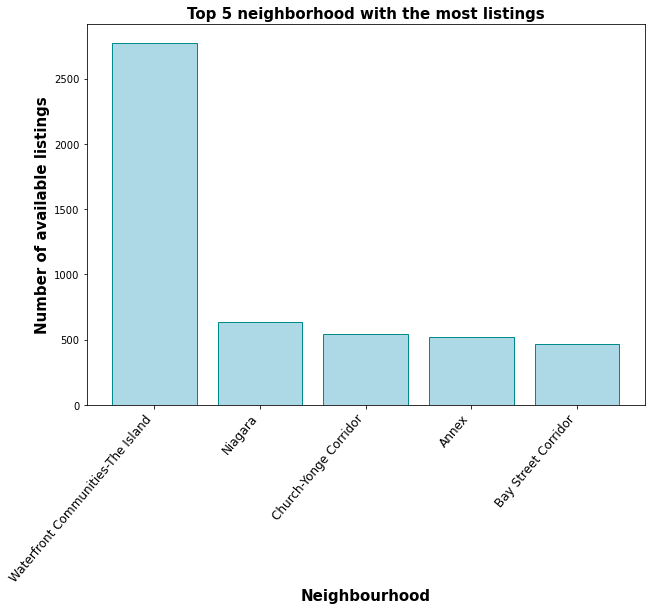

In [18]:
plt.figure(figsize =(10, 7))
plt.bar(neighbourhood_gr_srt['neighbourhood'], neighbourhood_gr_srt['n_listings'],color='lightblue',edgecolor='darkcyan',align='center')
plt.xlabel('Neighbourhood',fontsize='15',fontweight='heavy')
plt.ylabel('Number of available listings',fontsize='15',fontweight='heavy')
plt.title('Top 5 neighborhood with the most listings',fontsize='15',fontweight='heavy')
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='12'
)
plt.savefig('image4.png')
plt.show()

In [19]:
#'Top 5 neighbourhood with the most expensive listings 
neighbourhood_price_srt = toronto_df.groupby('neighbourhood')['price']\
                    .mean()\
                    .sort_values(ascending=False)\
                    .head(5)\
                    .reset_index()
print(neighbourhood_price_srt)

                       neighbourhood       price
0                             Rustic  691.000000
1                             Woburn  319.051724
2                  Forest Hill South  234.384615
3                     Bathurst Manor  198.871795
4  Waterfront Communities-The Island  195.528818


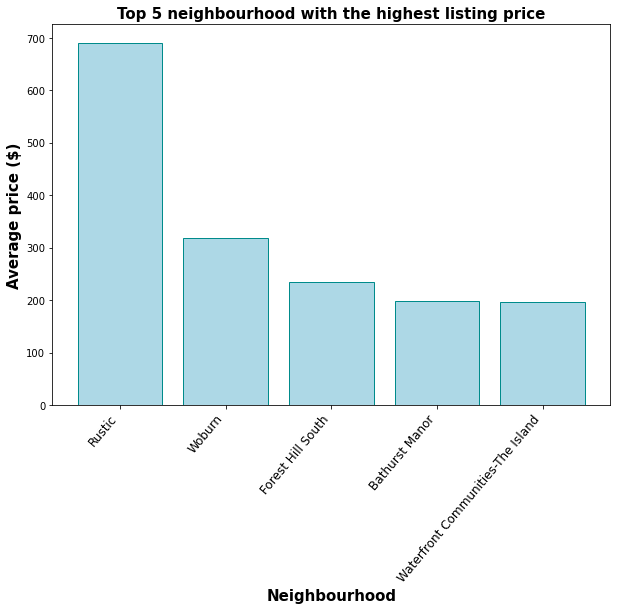

In [20]:
plt.figure(figsize =(10, 7))
plt.bar(neighbourhood_price_srt['neighbourhood'], neighbourhood_price_srt['price'],color='lightblue',edgecolor='darkcyan',align='center')
plt.xlabel('Neighbourhood',fontsize='15',fontweight='heavy')
plt.ylabel('Average price ($)',fontsize='15',fontweight='heavy')
plt.title('Top 5 neighbourhood with the highest listing price',fontsize='15',fontweight='heavy')
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='12'
)
plt.savefig('image6.png')
plt.show()


In [21]:
#'Top 5 neighbourhood with the cheapest listings
neighbourhood_price_srt = toronto_df.groupby('neighbourhood')['price']\
                    .mean()\
                    .sort_values(ascending=True)\
                    .head(5)\
                    .reset_index()
print(neighbourhood_price_srt)

            neighbourhood      price
0                 Malvern  45.581197
1  Glenfield-Jane Heights  50.851852
2      Caledonia-Fairbank  51.265306
3             Black Creek  52.545455
4           Eglinton East  54.500000


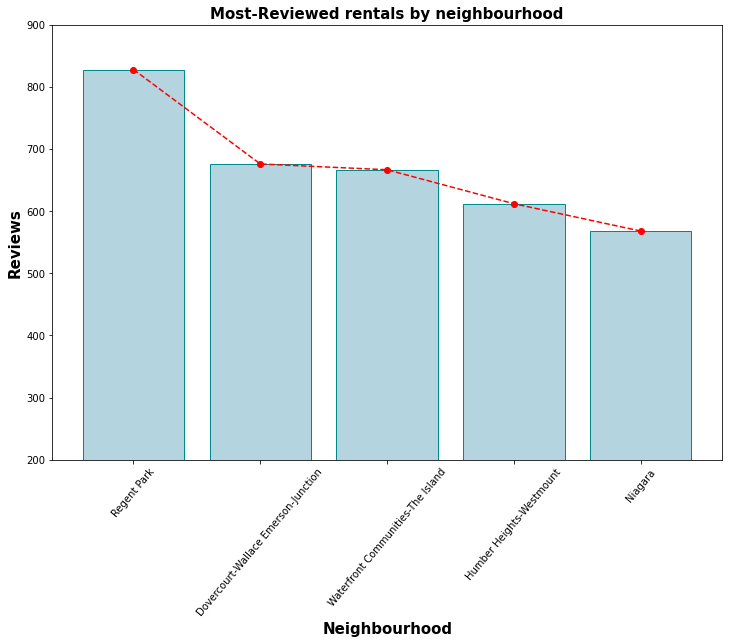

<Figure size 432x288 with 0 Axes>

In [22]:
# Most reviewed listings
reviews = toronto_df.sort_values('number_of_reviews',ascending=False)
top_reviewed = reviews.loc[:,['neighbourhood','number_of_reviews']][:7]
top_reviewed = top_reviewed.groupby('neighbourhood').mean().sort_values('number_of_reviews',ascending=False).reset_index()
fig5,ax3 = plt.subplots(figsize=(12,8))
sns.barplot(x=top_reviewed['neighbourhood'],y=top_reviewed['number_of_reviews'].values,color='lightblue', edgecolor=
            'darkcyan',ax=ax3)
plt.plot(top_reviewed['number_of_reviews'], marker='o', color='red',linestyle='--')
plt.xlabel('Neighbourhood',fontsize='15',fontweight='heavy')
plt.ylabel('Reviews', fontsize='15',fontweight='heavy')
plt.ylim((200,900))
for ax in ax3.get_xticklabels():
    ax.set_rotation(50)
plt.title('Most-Reviewed rentals by neighbourhood',fontsize='15',fontweight='heavy')
plt.show()
plt.savefig('image6.png')
sns.set()

# date and price

In [23]:
cal_df=pd.read_csv('calendar.csv.gz')
print(cal_df)

         listing_id        date available    price adjusted_price  \
0            778990  2021-02-09         f  $149.00        $149.00   
1              1419  2021-02-09         f  $469.00        $469.00   
2              1419  2021-02-10         f  $469.00        $469.00   
3              1419  2021-02-11         f  $469.00        $469.00   
4              1419  2021-02-12         f  $469.00        $469.00   
...             ...         ...       ...      ...            ...   
5779776    48078378  2022-02-04         f  $179.00        $179.00   
5779777    48078378  2022-02-05         f  $179.00        $179.00   
5779778    48078378  2022-02-06         f  $179.00        $179.00   
5779779    48078378  2022-02-07         f  $179.00        $179.00   
5779780    48078378  2022-02-08         f  $179.00        $179.00   

         minimum_nights  maximum_nights  
0                  28.0           365.0  
1                  28.0           730.0  
2                  28.0           730.0  
3  

In [24]:
cal_df.dtypes

listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [25]:
cal_df['date'] = pd.to_datetime(cal_df['date'])
cal_df['price'] = cal_df['price'].str.replace(',', '')
cal_df['price'] = cal_df['price'].str.replace('$', '')
cal_df['price'] = cal_df['price'].astype(float)
cal_df['date'] = pd.to_datetime(cal_df['date'])

<ipython-input-25-45b17f835c99>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  cal_df['price'] = cal_df['price'].str.replace('$', '')


In [26]:
median_price=cal_df['price'].median()
print(median_price)

100.0


In [27]:
cal_df.date.min(), cal_df.date.max()

(Timestamp('2021-02-08 00:00:00'), Timestamp('2022-02-10 00:00:00'))

In [28]:
price_month = cal_df.groupby(cal_df['date'].dt.strftime('%b'),
                             sort=False)['price'].mean()
                             

In [29]:
price_month

date
Feb    145.141406
Mar    141.029487
Apr    146.607951
May    154.484918
Jun    159.280363
Jul    161.285308
Aug    161.067438
Sep    159.999432
Oct    159.521207
Nov    159.217505
Dec    161.912281
Jan    162.111477
Name: price, dtype: float64

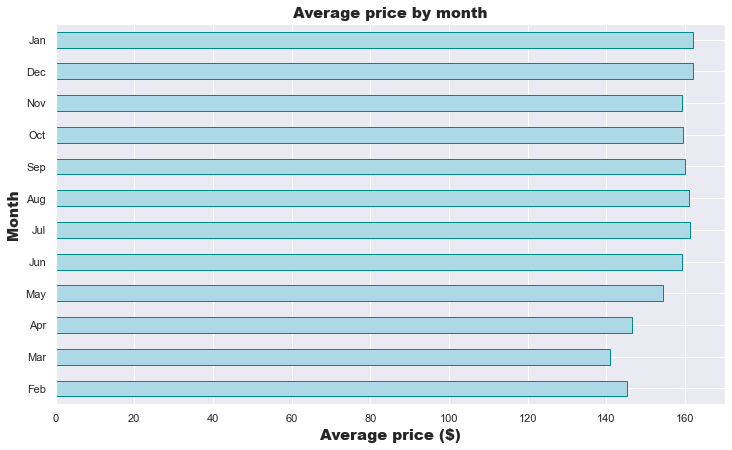

In [30]:
price_month.plot(kind = 'barh' , figsize = (12,7),color='lightblue',edgecolor='darkcyan',align='center')
plt.xlabel('Average price ($)',fontsize='15',fontweight='heavy')
plt.ylabel('Month',fontsize='15',fontweight='heavy')
plt.title('Average price by month',fontsize='15',fontweight='heavy')
plt.savefig('image7.png')
plt.show()


 The cheapest month was march and the most expensive was January

In [31]:
price_day = cal_df.groupby(cal_df['date'].dt.strftime('%A'),
                             sort=False)['price'].mean()

In [32]:
print(price_day)

date
Tuesday      154.482010
Wednesday    154.029192
Thursday     154.345108
Friday       160.130585
Saturday     160.358029
Sunday       154.605138
Monday       154.473227
Name: price, dtype: float64


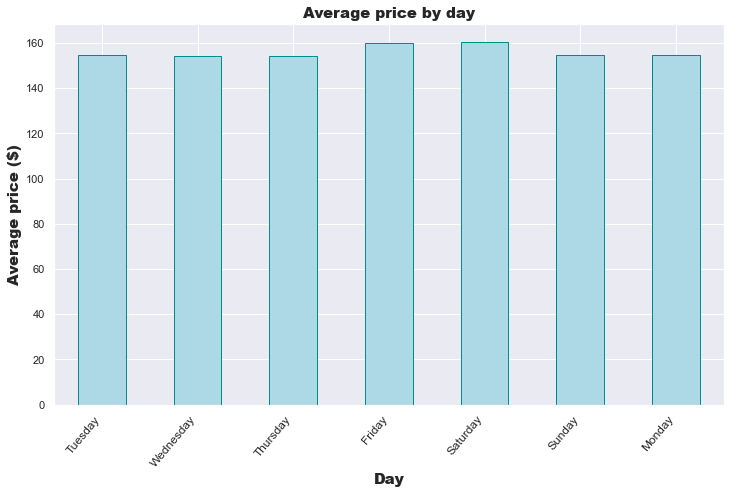

In [33]:
price_day.plot(kind = 'bar' , figsize = (12,7),color='lightblue',edgecolor='darkcyan',align='center')
plt.xlabel('Day',fontsize='15',fontweight='heavy')
plt.ylabel('Average price ($)',fontsize='15',fontweight='heavy')
plt.title('Average price by day',fontsize='15',fontweight='heavy')
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='12'
)
plt.savefig('image8.png')
plt.show()

Prices are the highest on Friday & Saturday